In [1]:
#!usr/bin/env python3

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#標準化→Standard Scaler
from sklearn.preprocessing import StandardScaler

#Support vector machine
from sklearn.svm import SVC

#RandomForest
#from sklearn.ensemble import RandomForestClassifier as RFC

#XGBoost
#import xgboost as xgb
#XGB = xgb.XGBClassifier()

#LightGBM
#import lightgbm as lgb
#LGB = lgb.LGBMClassifier(silent=False)

#次元削減→PCA
#from sklearn.decomposition import PCA

#特徴量選択→Gradient Boosting Classifier
#from sklearn.ensemble import GradientBoostingClassifier

#特徴量選択→Recursive feature elimination
#from sklearn.feature_selection import RFE

#特徴量選択→Select From Model
#from sklearn.feature_selection import SelectFromModel

# GridSearch
from sklearn.model_selection import GridSearchCV

# Stratified k-fold cross-validation
# Train test split
# Cross val score
# Cross val predict
# KFold
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score, cross_val_predict, KFold

# 指標を計算するため
from sklearn.metrics import accuracy_score, cohen_kappa_score, make_scorer, f1_score, recall_score, auc, plot_roc_curve, confusion_matrix

# 特徴量重要度の計算 → Permutation imporatance
#import eli5
#from eli5.sklearn import PermutationImportance

In [2]:
# データの読み込み
df=pd.read_csv('Table_all_data.csv')

#X yの設定
#Xの.dropで行or列を削除、axis=1で行を削除と指定。削除する行の指定は'group'で行う。
X=df.drop('group',axis=1) 

#yはdf内からgroupのみを取り出す。
y=df.group

In [3]:
#初期データの特徴量一覧
display(X.columns)

# 初期データの内容
print(X)

Index(['lh_G_and_S_frontomargin_thickness',
       'lh_G_and_S_occipital_inf_thickness',
       'lh_G_and_S_paracentral_thickness', 'lh_G_and_S_subcentral_thickness',
       'lh_G_and_S_transv_frontopol_thickness',
       'lh_G_and_S_cingul-Ant_thickness',
       'lh_G_and_S_cingul-Mid-Ant_thickness',
       'lh_G_and_S_cingul-Mid-Post_thickness',
       'lh_G_cingul-Post-dorsal_thickness',
       'lh_G_cingul-Post-ventral_thickness',
       ...
       'Pulvinar_L', 'Pulvinar_R', 'Subthalamic_nucleus_L',
       'Subthalamic_nucleus_R', 'Substantia_nigra_L', 'Substantia_nigra_R',
       'Red_nucleus_L', 'Red_nucleus_R', 'Dentate_L', 'Dentate_R'],
      dtype='object', length=168)

     lh_G_and_S_frontomargin_thickness  lh_G_and_S_occipital_inf_thickness  \
0                                2.280                               2.269   
1                                2.456                               2.035   
2                                2.298                               2.512   
3                                1.989                               2.513   
4                                1.887                               1.191   
..                                 ...                                 ...   
113                              2.384                               2.126   
114                              2.393                               2.249   
115                              2.018                               1.522   
116                              2.085                               2.053   
117                              2.134                               1.339   

     lh_G_and_S_paracentral_thickness  lh_G_and_S_subcentral_th

In [4]:
#標準化
std = StandardScaler()
std.fit(X)
X_std = std.transform(X)
print(X_std)

[[-0.02906059  0.64951919  1.11810139 ... -0.32385141 -1.32372888
  -1.14019472]
 [ 0.5756792  -0.01212487  0.17274128 ... -0.66125162 -1.6050801
  -1.39787723]
 [ 0.0327878   1.3366111   1.02219529 ... -0.41050369 -1.19089906
  -1.24325842]
 ...
 [-0.92929823 -1.46265224 -0.93702928 ... -1.36638929 -0.54121385
  -0.40498013]
 [-0.69908479  0.03877083  0.68994916 ...  1.68716818  0.51007996
   0.75673862]
 [-0.53071973 -1.98009182 -1.85156243 ...  1.1718123   1.18276926
   1.11793836]]


In [5]:
# model = SVC
clf = SVC(kernel='poly', C=200, gamma=0.0018, degree=2, probability=True, random_state=0)

##複数回k-fold/skfを行う際、random_stateを設定すると毎回同じ分け方になってしまうため、シード値は設定しない。

# K_fold : n=10
kf = KFold(n_splits=10, shuffle=True)

# Stratified K fold : 現状は上記のk-foldを使用する予定。
skf = StratifiedKFold(n_splits=10, shuffle=True)

# cross validationにどちらを選択するか　（k-fold or stratified k fold)
cv = skf

accuracy: [0.66666667 0.75       0.83333333 0.75       0.66666667 0.75
 0.91666667 1.         0.81818182 0.90909091]
mean_accuracy( 10 ): 0.806060606060606
iteration_accuracy: [0.806060606060606]
accuracy: [0.75       0.75       0.75       0.75       0.91666667 0.66666667
 0.83333333 0.66666667 0.90909091 0.81818182]
mean_accuracy( 9 ): 0.781060606060606
iteration_accuracy: [0.806060606060606, 0.781060606060606]
accuracy: [0.91666667 0.91666667 0.91666667 0.83333333 0.66666667 0.66666667
 0.66666667 0.66666667 0.81818182 0.90909091]
mean_accuracy( 8 ): 0.7977272727272727
iteration_accuracy: [0.806060606060606, 0.781060606060606, 0.7977272727272727]
accuracy: [0.66666667 0.75       0.83333333 0.75       0.91666667 0.91666667
 0.66666667 0.83333333 0.72727273 1.        ]
mean_accuracy( 7 ): 0.806060606060606
iteration_accuracy: [0.806060606060606, 0.781060606060606, 0.7977272727272727, 0.806060606060606]
accuracy: [0.66666667 0.66666667 0.83333333 0.75       0.66666667 0.91666667
 0.9166

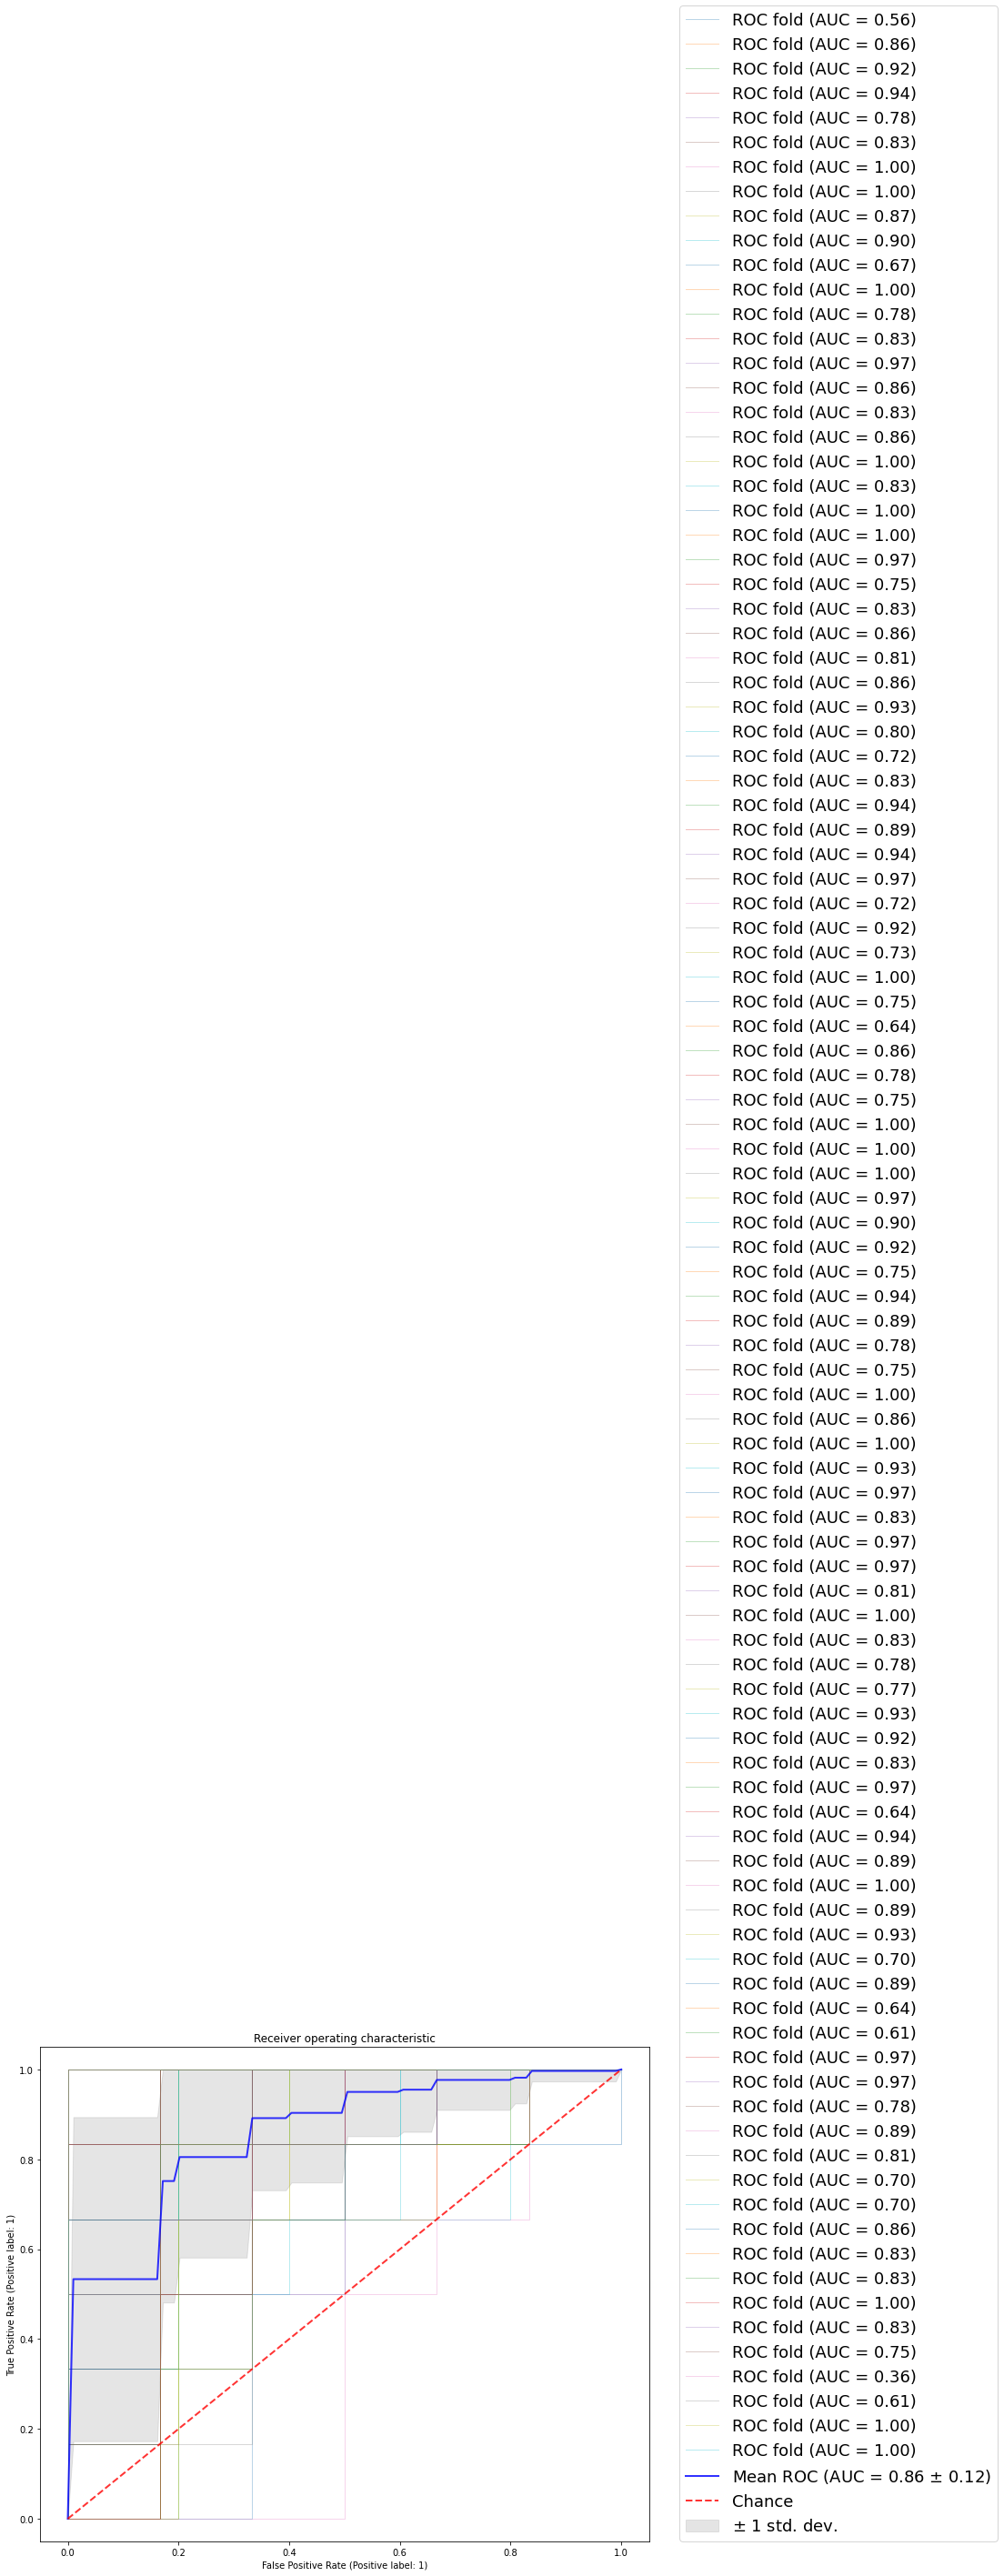

In [6]:
# Confusion matrix
tn = []
fp = []
fn = []
tp = []
tprs = []
aucs = []

mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots(figsize=(12,10))

mean_accuracy = []
mean_sensitivity = []
mean_specificity = []

iteration_tprs = []
iteration_accuracy = []
iteration_sensitivity = []
iteration_specificity = []

# iterationを繰り返し数として設定

iteration = 10

while iteration > 0:
    
    for i, (train, test) in enumerate(cv.split(X_std, y)):
        
        clf.fit(X_std[train], y[train])
        
        # Confusion matrix
        y_pred = clf.predict(X_std[test])
        y_true = y[test]
        
        confmat = confusion_matrix(y_true, y_pred)
        tn.append(confusion_matrix(y_true, y_pred)[0][0])
        fp.append(confusion_matrix(y_true, y_pred)[0][1])
        fn.append(confusion_matrix(y_true, y_pred)[1][0])
        tp.append(confusion_matrix(y_true, y_pred)[1][1])
        
        accuracy = ((np.array(tp)+np.array(tn))/(np.array(tp)+np.array(fp)+np.array(fn)+np.array(tn)))
        sensitivity = (np.array(tp)/(np.array(tp)+np.array(fn)))
        specificity = (np.array(tn)/(np.array(tn)+np.array(fp)))
        
        # ROC curve
        viz = plot_roc_curve(clf, X_std[test], y[test], name='ROC fold'.format(i), alpha=0.3, lw=1, ax=ax)
        
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)
        
        mean_tpr = np.mean(tprs, axis=0)
        mean_tpr[-1] = 1.0
        mean_auc = auc(mean_fpr, mean_tpr)
        std_auc = np.std(aucs)
        std_tpr = np.std(tprs, axis=0)
    
    # 10-fold後のaccuracy (10試行のaccuracy)
    print('accuracy:', accuracy)
    
    # 10-fold cross validationを1 iteration 試行した結果の各種指標。(=通常のCV)
    mean_accuracy = accuracy.mean()
    mean_sensitivity = sensitivity.mean()
    mean_specificity = specificity.mean()
        
    print ('mean_accuracy(', iteration, '):', mean_accuracy)
        
    #epoch_accuracyにepochごとの10-fold CV：mean_accuracyを追加。
    iteration_accuracy.append(mean_accuracy)
    
    print('iteration_accuracy:', iteration_accuracy)
    
    #1試行終了したのでConfusion matrixをクリアする。
    tn = np.delete(tn, 0, axis = 0)
    fp = np.delete(fp, 0, axis = 0)
    fn = np.delete(fn, 0, axis = 0)
    tp = np.delete(tp, 0, axis = 0)

    tn = []
    fp = []
    fn = []
    tp = []

    iteration = iteration -1
    
# while構文を抜けた(=iterationを規定回数終了)後の処理
# iteration回数繰り返したCVの平均を算出
    
mean_iteration_accuracy = np.mean(iteration_accuracy)
print('mean_iteration_accuracy:', mean_iteration_accuracy)

# ROC curve描画

ax.plot(mean_fpr, mean_tpr, color='b', label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc), lw=2, alpha=.8)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)

tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=0.2, label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic")
ax.legend(loc="lower right")

plt.legend(bbox_to_anchor=(1.05, 0), loc='lower left', borderaxespad=0, fontsize=18)

plt.show()

In [7]:
# External validation
# データの読み込み
df2=pd.read_csv('Table_ncu_all_data.csv')

X_test=df2.drop('group',axis=1) 

std.fit(X_test)
X_test_std = std.transform(X_test)
print(X_test_std)

y_test=df2.group

print(y_test)

[[-0.21096896 -0.23442729  0.09549723 ... -0.15761613 -0.93947947
  -1.41993151]
 [ 0.54058696 -0.09825714  0.95073123 ... -0.59154648 -1.10110708
  -1.01396524]
 [ 1.7305505   0.26486325  0.32817119 ... -0.32325225 -0.82089523
  -1.18394909]
 ...
 [ 0.86818826 -0.02260706  0.05462208 ...  0.09506024 -0.83936943
  -0.65344262]
 [-0.88062456 -0.71858781 -0.64654404 ... -0.99156351  0.71737932
   1.64378086]
 [ 0.38642164 -1.09683821 -2.15263627 ... -1.14054148 -0.61582404
  -0.73248831]]
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    1
22    1
23    1
24    1
25    1
26    1
27    1
28    1
29    1
30    1
31    1
32    1
33    1
34    1
35    1
36    1
37    1
38    1
39    1
40    1
41    1
42    1
Name: group, dtype: int64


In [8]:
# Internal validationに用いた全データでモデル作成
clf.fit(X_std, y)

SVC(C=200, degree=2, gamma=0.0018, kernel='poly', probability=True,
    random_state=0)

In [9]:
y_pred = clf.predict(X_test_std)
y_true = y_test
        
confmat = confusion_matrix(y_true, y_pred)
tn.append(confusion_matrix(y_true, y_pred)[0][0])
fp.append(confusion_matrix(y_true, y_pred)[0][1])
fn.append(confusion_matrix(y_true, y_pred)[1][0])
tp.append(confusion_matrix(y_true, y_pred)[1][1])
        
accuracy = ((np.array(tp)+np.array(tn))/(np.array(tp)+np.array(fp)+np.array(fn)+np.array(tn)))
sensitivity = (np.array(tp)/(np.array(tp)+np.array(fn)))
specificity = (np.array(tn)/(np.array(tn)+np.array(fp)))

print('accuracy(external validation) =', accuracy)

accuracy(external validation) = [0.58139535]
